Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## connect with google drive 

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## copy your path of this file from your google drive

In [2]:
!unzip /content/gdrive/MyDrive/Assignment/CNN_assignment.zip

Archive:  /content/gdrive/MyDrive/Assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  


## there are 9 category 

1-nevus

2-basal cell carcinoma

3-melanoma

4-vascular lesion

5-actinic keratosis

6-squamous cell carcinoma

7-dermatofibroma

8-pigmented benign keratosis

9-seborrheic keratosis


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from keras.layers import Flatten
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers,Input
from tensorflow.keras.models import Sequential
import json
import math
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, InputLayer
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import VGG19,VGG16
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

print("data_dir_train is :", data_dir_train)

data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

print("data_dir_test is :", data_dir_test)



data_dir_train is : /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train
data_dir_test is : /content/Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [8]:
print(os.listdir(data_dir_train))


['nevus', 'basal cell carcinoma', 'melanoma', 'vascular lesion', 'actinic keratosis', 'squamous cell carcinoma', 'dermatofibroma', 'pigmented benign keratosis', 'seborrheic keratosis']


In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [10]:
#Transfer 'jpg' images to an array IMG
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpg":
            img = read(PATH)

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (RESIZE,RESIZE))
          
           
            IMG.append(np.array(img))
    return IMG

## path for train 



In [17]:
neus_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus' ,180))
basal_cell_carcinoma_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma',180))
melanoma_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',180))
vascular_lesion_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion',180))
actinic_keratosis_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',180))
squamous_cell_carcinoma_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma',180))
dermatofibroma_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma',180))
pigmented_benign_keratosis_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',180))
seborrheic_keratosis_train = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis',180))

100%|██████████| 77/77 [00:01<00:00, 75.18it/s]


## path for test

In [18]:
neus_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus' ,180))
basal_cell_carcinoma_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma',180))
melanoma_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma',180))
vascular_lesion_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion',180))
actinic_keratosis_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis',180))
squamous_cell_carcinoma_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma',180))
dermatofibroma_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma',180))
pigmented_benign_keratosis_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis',180))
seborrheic_keratosis_test = np.array(Dataset_loader('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis',180))

100%|██████████| 3/3 [00:00<00:00, 71.34it/s]


In [19]:
classes = [" " , 'nevus', 'basal cell carcinoma', 'melanoma', 'vascular lesion', 'actinic keratosis', 'squamous cell carcinoma', 'dermatofibroma', 'pigmented benign keratosis', 'seborrheic keratosis']

def map_label(num):
  return classes[num]


print(map_label(5))

actinic keratosis


## make label for images 

In [20]:
neus_label = np.full((len(neus_train) + len(neus_test),) , 0)

basal_cell_carcinoma_label = np.full((len(basal_cell_carcinoma_train) + len(basal_cell_carcinoma_test),) , 1)

melanoma_label = np.full((len(melanoma_train) + len(melanoma_test),) , 2)

vascular_lesion_label = np.full((len(vascular_lesion_train) + len(vascular_lesion_test),) , 3)

actinic_keratosis_label = np.full((len(actinic_keratosis_train) + len(actinic_keratosis_test),) , 4)

squamous_cell_carcinoma_label = np.full((len(squamous_cell_carcinoma_train) + len(squamous_cell_carcinoma_test),) , 5)

dermatofibroma_label = np.full((len(dermatofibroma_train) + len(dermatofibroma_test),) , 6)

pigmented_benign_keratosis_label = np.full((len(pigmented_benign_keratosis_train) + len(pigmented_benign_keratosis_test),) , 7)

seborrheic_keratosis_label = np.full((len(seborrheic_keratosis_train) + len(seborrheic_keratosis_test),) , 8)



## concatenate y_label

In [21]:
Y_train = np.concatenate((neus_label, basal_cell_carcinoma_label,
                          melanoma_label ,vascular_lesion_label,
                          actinic_keratosis_label ,squamous_cell_carcinoma_label,
                          dermatofibroma_label ,pigmented_benign_keratosis_label,
                          seborrheic_keratosis_label), axis = 0)

In [ ]:
print("Y_train_ shape is " , Y_train.shape)

Y_train_ shape is  (2357,)


## concatenate

In [22]:

# Merge data 
X_train = np.concatenate((neus_train, neus_test ,
                          basal_cell_carcinoma_train, basal_cell_carcinoma_test, 
                          melanoma_train,melanoma_test,
                          vascular_lesion_train ,vascular_lesion_test ,
                          actinic_keratosis_train , actinic_keratosis_test ,
                          squamous_cell_carcinoma_train ,squamous_cell_carcinoma_test ,
                          dermatofibroma_train,dermatofibroma_test ,
                          pigmented_benign_keratosis_train ,pigmented_benign_keratosis_test,
                          seborrheic_keratosis_train ,seborrheic_keratosis_test) ,  axis = 0)

In [23]:
X_train = X_train/255.0

In [24]:
X_train.shape

(2357, 180, 180, 3)

In [25]:
X_train[0]

array([[[0.61960784, 0.66666667, 0.76078431],
        [0.61960784, 0.66666667, 0.76078431],
        [0.61960784, 0.66666667, 0.76078431],
        ...,
        [0.62352941, 0.66666667, 0.77254902],
        [0.63921569, 0.6745098 , 0.78039216],
        [0.63921569, 0.6745098 , 0.78039216]],

       [[0.61960784, 0.66666667, 0.76078431],
        [0.61960784, 0.66666667, 0.76078431],
        [0.61960784, 0.66666667, 0.76078431],
        ...,
        [0.62352941, 0.66666667, 0.77254902],
        [0.63921569, 0.6745098 , 0.78039216],
        [0.63921569, 0.6745098 , 0.78039216]],

       [[0.61568627, 0.6627451 , 0.75686275],
        [0.62352941, 0.67058824, 0.76470588],
        [0.61176471, 0.65882353, 0.75294118],
        ...,
        [0.62352941, 0.66666667, 0.77254902],
        [0.63529412, 0.66666667, 0.77647059],
        [0.62745098, 0.66666667, 0.76862745]],

       ...,

       [[0.63137255, 0.6745098 , 0.75294118],
        [0.63921569, 0.68627451, 0.76470588],
        [0.63529412, 0

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [26]:
batch_size = 32
img_height = 180
img_width = 180

In [27]:

# Shuffle train data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]


# To categorical
Y_train = to_categorical(Y_train, num_classes= 9)

In [28]:
Y_train[1000]

array([0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
train_ds = X_train[:1885]
train_ys = Y_train[:1885]
val_ds = X_train[1885:]
val_ys = Y_train[1885:]

Use 80% of the images for training, and 20% for validation.

In [30]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=11
)




In [31]:
print("x_train shape is : ", x_train.shape)
print("y_train shape is : ", y_train.shape)


x_train shape is :  (1885, 180, 180, 3)
y_train shape is :  (1885, 9)


In [32]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

print("x_val shape is : ", x_val.shape)
print("y_val shape is : ", y_val.shape)

x_val shape is :  (472, 180, 180, 3)
y_val shape is :  (472, 9)


In [33]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = classes[1:]
print(class_names)

['nevus', 'basal cell carcinoma', 'melanoma', 'vascular lesion', 'actinic keratosis', 'squamous cell carcinoma', 'dermatofibroma', 'pigmented benign keratosis', 'seborrheic keratosis']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

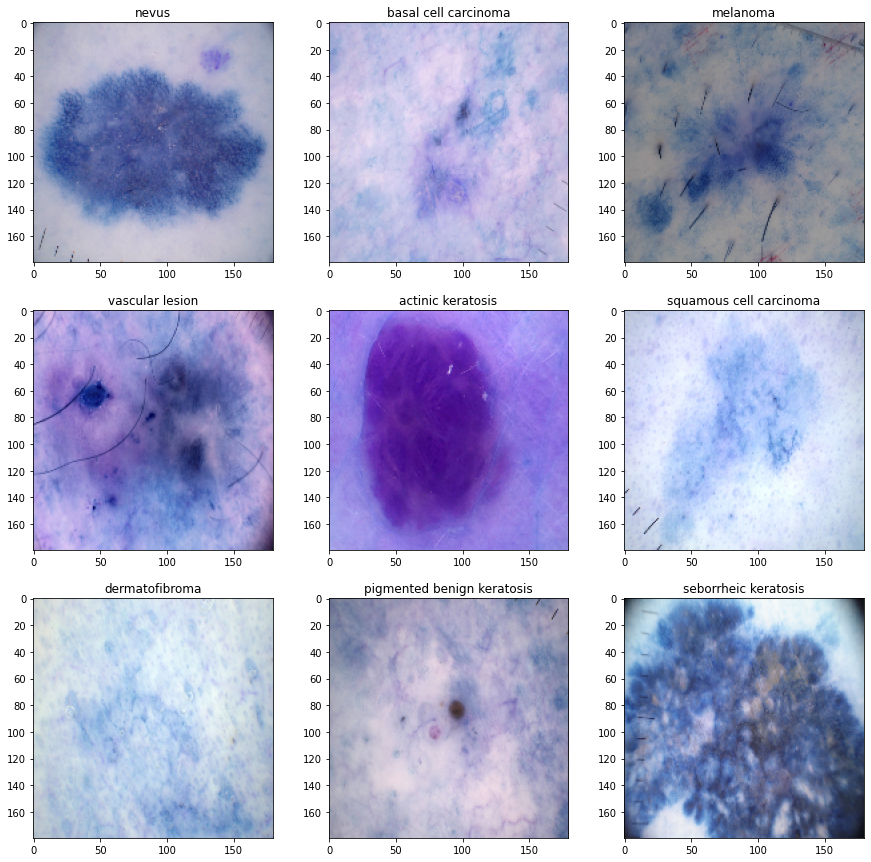

In [34]:
w = 60 
h = 40
fig = plt.figure(figsize=(15,15))
columns = 3
row = 3

for i in range(1, row*columns +1):
  str = map_label(i)
  ax = fig.add_subplot(row , columns , i)
  if np.argmax(y_train[i] == i):
  
    ax.title.set_text(str)

  else:
    ax.title.set_text(str)
  plt.imshow(x_train[i])
plt.show()

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [35]:
BATCH_SIZE = 16

# Using original generator
train_generator = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False
    )

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [36]:
input_shape = (180,180,3)
pretrain_model = VGG16(
        include_top=False, 
        weights='imagenet', 
        input_shape=None)    

input_tensor = Input(shape=input_shape)
bn = BatchNormalization()(input_tensor)
x = pretrain_model(bn)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)

x = Dropout(0.1)(x)

output = Dense(9, activation='softmax')(x)
model = Model(input_tensor, output)
    
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              52432896  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
______________________________________________________________

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [37]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [38]:
# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="./weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [39]:
epochs = 20


In [40]:
history = model.fit(
    x_train, y_train, batch_size=BATCH_SIZE,
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)




Epoch 1/20
117/117 [==============================] - 31s 184ms/step - loss: 2.0682 - accuracy: 0.2044 - val_loss: 2.0581 - val_accuracy: 0.2182
Epoch 2/20
117/117 [==============================] - 20s 169ms/step - loss: 1.7880 - accuracy: 0.3215 - val_loss: 1.9791 - val_accuracy: 0.1780
Epoch 3/20
117/117 [==============================] - 20s 173ms/step - loss: 1.7548 - accuracy: 0.3425 - val_loss: 1.6165 - val_accuracy: 0.3814
Epoch 4/20
117/117 [==============================] - 21s 176ms/step - loss: 1.5844 - accuracy: 0.4041 - val_loss: 1.4899 - val_accuracy: 0.4492
Epoch 5/20
117/117 [==============================] - 22s 183ms/step - loss: 1.5724 - accuracy: 0.4138 - val_loss: 1.6065 - val_accuracy: 0.4428
Epoch 6/20
117/117 [==============================] - 22s 185ms/step - loss: 1.4754 - accuracy: 0.4594 - val_loss: 1.4709 - val_accuracy: 0.4661
Epoch 7/20
117/117 [==============================] - 21s 180ms/step - loss: 1.3725 - accuracy: 0.5116 - val_loss: 1.4111 - val_ac

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


### Visualizing training results

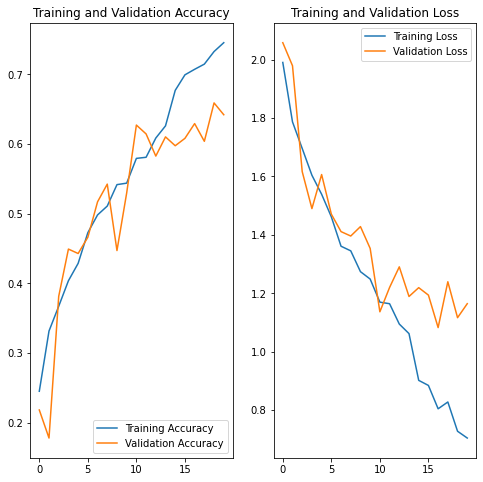

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [43]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Using original generator
train_generator = ImageDataGenerator(
       rotation_range=10,
       width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
       height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
       horizontal_flip=True,  # randomly flip images
       vertical_flip=False # randomly flip images
    )
# Your code goes here

In [44]:
path_image = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0024504.jpg'

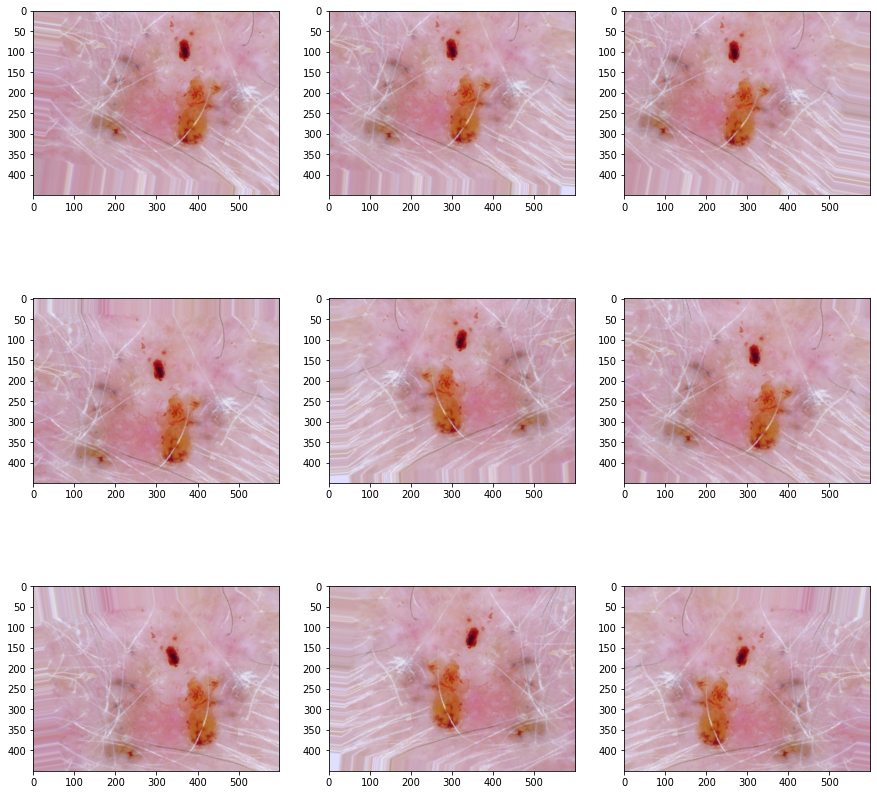

In [45]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
fig = plt.figure(figsize=(15,15))

# load the image
img = load_img(path_image)
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
# prepare iterator
it = train_generator.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [46]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
input_shape = (180,180,3)
pretrain_model = VGG16(
        include_top=False, 
        weights='imagenet', 
        input_shape=None)    

input_tensor = Input(shape=input_shape)
bn = BatchNormalization()(input_tensor)
x = pretrain_model(bn)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)

x = Dropout(0.1)(x)

output = Dense(9, activation='softmax')(x)
model2 = Model(input_tensor, output)
    
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()
## Your code goes here



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              52432896  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              419532

### Compiling the model

In [47]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [48]:
BATCH_SIZE = 64

In [49]:

history = model.fit(
    x_train, y_train, batch_size=BATCH_SIZE,
    steps_per_epoch=x_train.shape[0] / BATCH_SIZE,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[learn_control, checkpoint]
)

Epoch 1/20
29/29 [==============================] - 28s 764ms/step - loss: 0.4825 - accuracy: 0.8307 - val_loss: 1.1366 - val_accuracy: 0.6504
Epoch 2/20
29/29 [==============================] - 19s 638ms/step - loss: 0.4173 - accuracy: 0.8224 - val_loss: 1.2806 - val_accuracy: 0.6504
Epoch 3/20
29/29 [==============================] - 19s 635ms/step - loss: 0.2865 - accuracy: 0.8839 - val_loss: 1.2871 - val_accuracy: 0.6589
Epoch 4/20
29/29 [==============================] - 19s 631ms/step - loss: 0.2503 - accuracy: 0.8886 - val_loss: 1.4758 - val_accuracy: 0.6462
Epoch 5/20
29/29 [==============================] - 19s 632ms/step - loss: 0.2444 - accuracy: 0.8985 - val_loss: 1.5811 - val_accuracy: 0.6250
Epoch 6/20
29/29 [==============================] - 19s 635ms/step - loss: 0.2314 - accuracy: 0.9053 - val_loss: 1.9138 - val_accuracy: 0.6314
Epoch 7/20
29/29 [==============================] - 19s 635ms/step - loss: 0.2968 - accuracy: 0.8921 - val_loss: 1.5283 - val_accuracy: 0.6589

### Visualizing the results

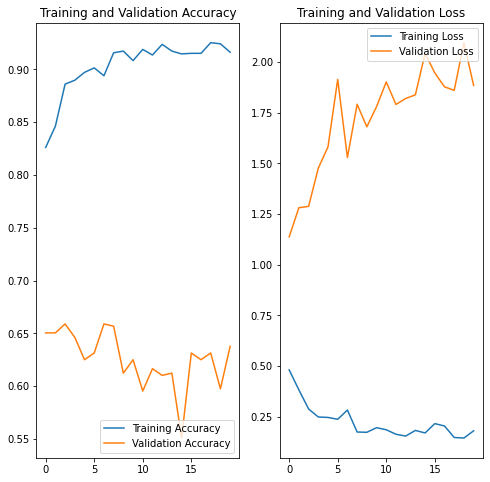

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [51]:
## Your code goes here.

model.evaluate(x_val, y_val)

15/15 [==============================] - 2s 92ms/step - loss: 1.8841 - accuracy: 0.6377


[1.8840715885162354, 0.6377118825912476]

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [52]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [53]:
class_names

['nevus',
 'basal cell carcinoma',
 'melanoma',
 'vascular lesion',
 'actinic keratosis',
 'squamous cell carcinoma',
 'dermatofibroma',
 'pigmented benign keratosis',
 'seborrheic keratosis']

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [54]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [55]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.


#### **Todo:** Create a validation dataset

In [56]:
data_dir_val = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_val,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
## your code goes here
input_shape = (180,180,3)
pretrain_model = VGG16(
        include_top=False, 
        weights='imagenet', 
        input_shape=None)    

input_tensor = Input(shape=input_shape)
bn = BatchNormalization()(input_tensor)
x = pretrain_model(bn)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)

x = Dropout(0.1)(x)

output = Dense(9, activation='softmax')(x)
model2 = Model(input_tensor, output)
    



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [58]:
## your code goes here

model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [59]:
x_train.shape


(1885, 180, 180, 3)

In [60]:

history = model.fit(train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE),
                                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                                    validation_data=(x_val, y_val),
                                    validation_steps=len(x_val)//BATCH_SIZE,
                                    epochs=20,
                                    verbose=1)


Epoch 1/20
29/29 [==============================] - 22s 743ms/step - loss: 1.0816 - accuracy: 0.6623 - val_loss: 1.0365 - val_accuracy: 0.6441
Epoch 2/20
29/29 [==============================] - 20s 675ms/step - loss: 0.8128 - accuracy: 0.7304 - val_loss: 1.0277 - val_accuracy: 0.6780
Epoch 3/20
29/29 [==============================] - 20s 672ms/step - loss: 0.6771 - accuracy: 0.7639 - val_loss: 0.9672 - val_accuracy: 0.6758
Epoch 4/20
29/29 [==============================] - 20s 669ms/step - loss: 0.6236 - accuracy: 0.7721 - val_loss: 1.0492 - val_accuracy: 0.6462
Epoch 5/20
29/29 [==============================] - 20s 668ms/step - loss: 0.6145 - accuracy: 0.7858 - val_loss: 1.2937 - val_accuracy: 0.6398
Epoch 6/20
29/29 [==============================] - 20s 675ms/step - loss: 0.6302 - accuracy: 0.7798 - val_loss: 1.0489 - val_accuracy: 0.6631
Epoch 7/20
29/29 [==============================] - 20s 677ms/step - loss: 0.5482 - accuracy: 0.8089 - val_loss: 1.1331 - val_accuracy: 0.6589

#### **Todo:**  Visualize the model results

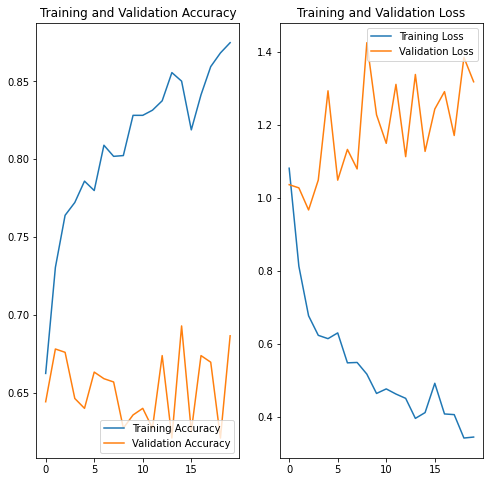

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
#### yes model enter overfit because of augmentation, class rebalance helped


In [62]:
model.evaluate(x_val , y_val)

15/15 [==============================] - 1s 94ms/step - loss: 1.3185 - accuracy: 0.6864


[1.3184689283370972, 0.6864407062530518]